Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "XAVIER MALTAS TARRIDAS"
COLLABORATORS = ""

---

<div class=WordSection1>

<h1>Activitat YARN: Execució de treballs mitjançant gestors de recursos</h1>

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>Nota</h2>
<p class=MsoNormal>En alguns dels exercicis caldrà realitzar <b>captures de pantalla que justifiquin les respostes</b>. Les captures de pantalla es poden fer amb les eines del sistema operatiu que esteu utilitzant. Per copiar la imatge al porta-retalls podeu utilitzar diferents mètodes: "Eina de Retallades" a Windows, "Imprimir pantalla", Ctrl+C al seleccionar una imatge, etc... Les imatges una vegada capturades es poden enganxar directament a les cel·les de resposta, mitjançant Ctrl+V o amb el menú contextual que apareix amb el botó dret del ratolí, cosa que enganxarà la imatge que estigui al porta-retalls. Per veure la imatge cal executar la cel·la. </p>

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>1<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span> Introducció</h2>

<p class=MsoNormal>A l'activitat anterior vam començar a familiaritzar-nos amb un entorn big data, treballant amb un sistema d'arxius distribuïts i fent ingestes de dades. En aquesta activitat, l'exercici consisteix a executar treballs de processament i a saber gestionar-los mitjançant una eina de gestió de recursos.</p>

<p class=MsoNormal><span style='line-height:115%'>Abans de començar amb l'enunciat de l'activitat, revisarem una mica la composició del sistema Big Data que esteu utilitzant. En la següent imatge, mitjançant el Cloudera Manager (el gestor del sistema que utilitzem <a href="https://www.cloudera.com/products/open-source/apache-hadoop/key-cdh-components.html" name="_ftnref1" title="">[CDH Components]</a>), podem veure com està configurat el nostre entorn i els seus recursos disponibles. És interessant veure (Figura 1) que en el nostre cas el clúster està compost per 4 màquines, una principal, i més gran, i tres auxiliars més modestes. Podeu veure les característiques de les màquines a les diverses columnes de l'esquerra. En el vostre cas, quan accediu al sistema, ho feu mitjançant la màquina “eimtcld.uoc.edu”. </span></p>

<p class=MsoNormal align=center style='text-align:center'><span style='line-height:115%'><img id="Picture 25" src="image001.png" alt="Graphical user interface, application&#10;&#10;Description automatically generated"></span></p>

<p class=MsoNormal align=center style='text-align:center'><span style='font-size:9.0pt;line-height:115%'>Figura 1: Descripció del sistema Cloudera instal·lat per la realització de les activitats.</span></p>

<p class=MsoNormal><span style='line-height:115%'>A la Figura 2 podeu veure la configuració del resource manager utilitzat, el Yarn. Veiem que cadascuna de les màquines està corrent un “Node manager” de Yarn gestionat pel “Resource Manager” que s'executa a la màquina principal. Si no recordeu bé aquests conceptes podeu revisar la "Secció 2 Apache Yarn" del contingut teòric del mòdul actual (Document Gestors de recursos).</span></p>

<p class=MsoNormal><span style='line-height:115%'>Per tant, qualsevol procés que s'executi mitjançant Yarn s'executarà (si ho considera necessari) utilitzant tots els recursos del sistema. Mitjançant els següents exercicis veurem com utilitzar Yarn, com analitzar les característiques del programa executat i veurem el resultat de l'execució.</span></p>

<p class=MsoNormal align=center style='text-align:center'><span style='font-size:9.0pt;line-height:115%'>&nbsp;</span></p>

<p class=MsoNormal align=center style='text-align:center'><span style='line-height:115%'><img id="Picture 24" src="image002.png" alt="Graphical user interface, application&#10;&#10;Description automatically generated"></span></p>

<p class=MsoNormal align=center style='text-align:center'><span style='font-size:9.0pt;line-height:115%'>Figura 2: Configuració del gestor de recursos Yarn a la màquina utilitzada en l'assignatura.</span></p>

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>2<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>Execució de Spark </h2>
<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>2.1<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>Descripció del programa
SparkPi</h3>
<p class=MsoNormal>En aquest exercici pràctic treballarem sobre un
programa ja compilat i preparat per executar-se. El programa que utilitzarem
és un exemple que ve incorporat en la instal·lació de Cloudera, es fa servir
com a exemple base per realitzar tasques de comprovació d'operativitat del
sistema i rendiment. Podeu trobar el programa a:</p>
<p class=MsoNormal><span style='font-size:12.0pt;line-height:115%;font-family:
"Courier New"'>/opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar</span></p>
<p class=MsoNormal>En concret, dins dels exemples inclosos amb la distribució de spark, farem servir SparkPi. Com podeu veure el programa està construït en Java (arxiu jar), però no el modificarem. Només l'executarem. 

El següent enllaç descriu com executar aplicacions en Spark:
<a href="https://docs.cloudera.com/HDPDocuments/HDP3/HDP-3.1.0/running-spark-applications/content/running_sample_spark_2_x_applications.html" title="">Execució d'aplicacions Apache Spark</a>

Teniu una mica de documentació per revisar aquests exemples i programes (i codi en Java, Scala i Python) a:</p>

<a href="https://spark.apache.org/examples.html" title="">Exemples Apache Spark</a>
<p>i teniu una implementació d'aquest programa en Scala a </p>

<a href="https://github.com/apache/spark/blob/master/examples/src/main/scala/org/apache/spark/examples/SparkPi.scala" title="">Github</a>
<p class=MsoNormal>En aquest primer apartat es demana que descriviu: </p>
<p class=MsoListParagraphCxSpFirst style='text-indent:-18.0pt'><span
style='font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span>Què fa el programa?</p>

El codi font proporcionat correspon a l'exemple 'SparkPi', que és una aplicació Apache Spark senzilla que té com a finalitat estimar el valor del nombre pi. Analitzant el codi font podem determinar que l'estimació del valor del nombre pi es realitza mitjançant el mètode de Monte Carlo. Aquest mètode és una tècnica estadística i computacional on s'utilitzen nombres aleatoris per resoldre problemes numèrics o geomètrics. En el context del programa, es generen punts aleatoris dins d'un quadrat unitari i es fa servir la probabilitat que aquests punts es trobin dins d'un cercle unitari per estimar el valor de Pi.

Com ho fa?

En primer lloc, i després de realitzar les importacions necessàries per executar una aplicació Spark, veiem que s'estableix un SparkSession utilitzant el mètode 'SparkSession.builder'.
A continuació, observem que el programa usa un argument de la línia d'ordres ('slices') que ens permet definir el nombre de processaments en paral·lel. Seguidament, s'inicia la lògica principal del problema i on es duu a terme l'estimació utilitzant el mètode de Monte Carlo.
Es calcula el nombre total de punts (n) mitjançant el producte de 100.000 pel nombre de 'slices'. Es crea un RDD (Resilient Distributed Dataset) utilitzant el mètode 'spark.sparkContext.parallelize'. Aquest RDD es distribuirà entre el nombre específic de particions o slices. Per a cada punt, es generen dues coordenades aleatòries (x,y) entre el rang de (-1 a 1) representant un punt dins d'un quadrat unitari centrat a l'origen. Seguidament, es comprova si aquestes coordenades es situen dins un cercle unitari i es comptabilitza quants han quedat dins i quants fora.
Finalment, l'estimació del nombre pi es computarà per mitjà de la següent fórmula:

4 * (n punts dins el cercle)/(n)

Per acabar el procés, s'atura i s'alliberen recursos amb el mètode 'spark.stop'.

Quins paràmetres rep per la seva execució i per què serveixen?

L'únic paràmetre que rep l'aplicació 'Sparkpi' és 'slices'. Aquest paràmetre correspon al nombre de particions que s'utilitzen per a paral·lelitzar un càlcul i té la finalitat de determinar com es distribuiran les operacions entre les diverses particions. Augmentar el nombre de 'slices' pot millorar la paral·lelització i reduir el temps d'execució, però també pot augmentar la sobrecàrrega de la xarxa. El valor d'aquest paràmetre depèn de les característiques del clúster i els necessitats de l'aplicació. En cas de no especificar aquest paràmetre, el seu valor predeterminat és 2.

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>2.2<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>Execució</h3>
<p class=MsoNormal>Reviseu la documentació de Cloudera <a href="https://docs.cloudera.com/runtime/7.2.1/running-spark-applications/topics/spark-running-spark-apps-on-yarn.html"
name="_ftnref3" title=""><span class=MsoFootnoteReference><span
class=MsoFootnoteReference><span style='font-size:12.0pt;line-height:115%;
font-family:"Calibri",sans-serif'>[Executant aplicacions Spark a YARN]</span></span></span></a> i executeu el
programa usant Yarn en mode client, amb una memòria per executor d'1
gigabyte i configurant el programa SparkPi per realitzar 10 particions. Heu d'executar el programa mitjançant un terminal (loguejats via ssh o directament amb el
terminal de Jupyter), mitjançant la comanda spark-submit. Una vegada executat, el resultat esperat ha de ser semblant
al següent:</p>
<p class=MsoNormal><img 
id="Imatge 1" src="image004.jpg"
alt="Interfície gràfica d'usuari, text&#10;&#10;Descripció generada automàticament"></p>

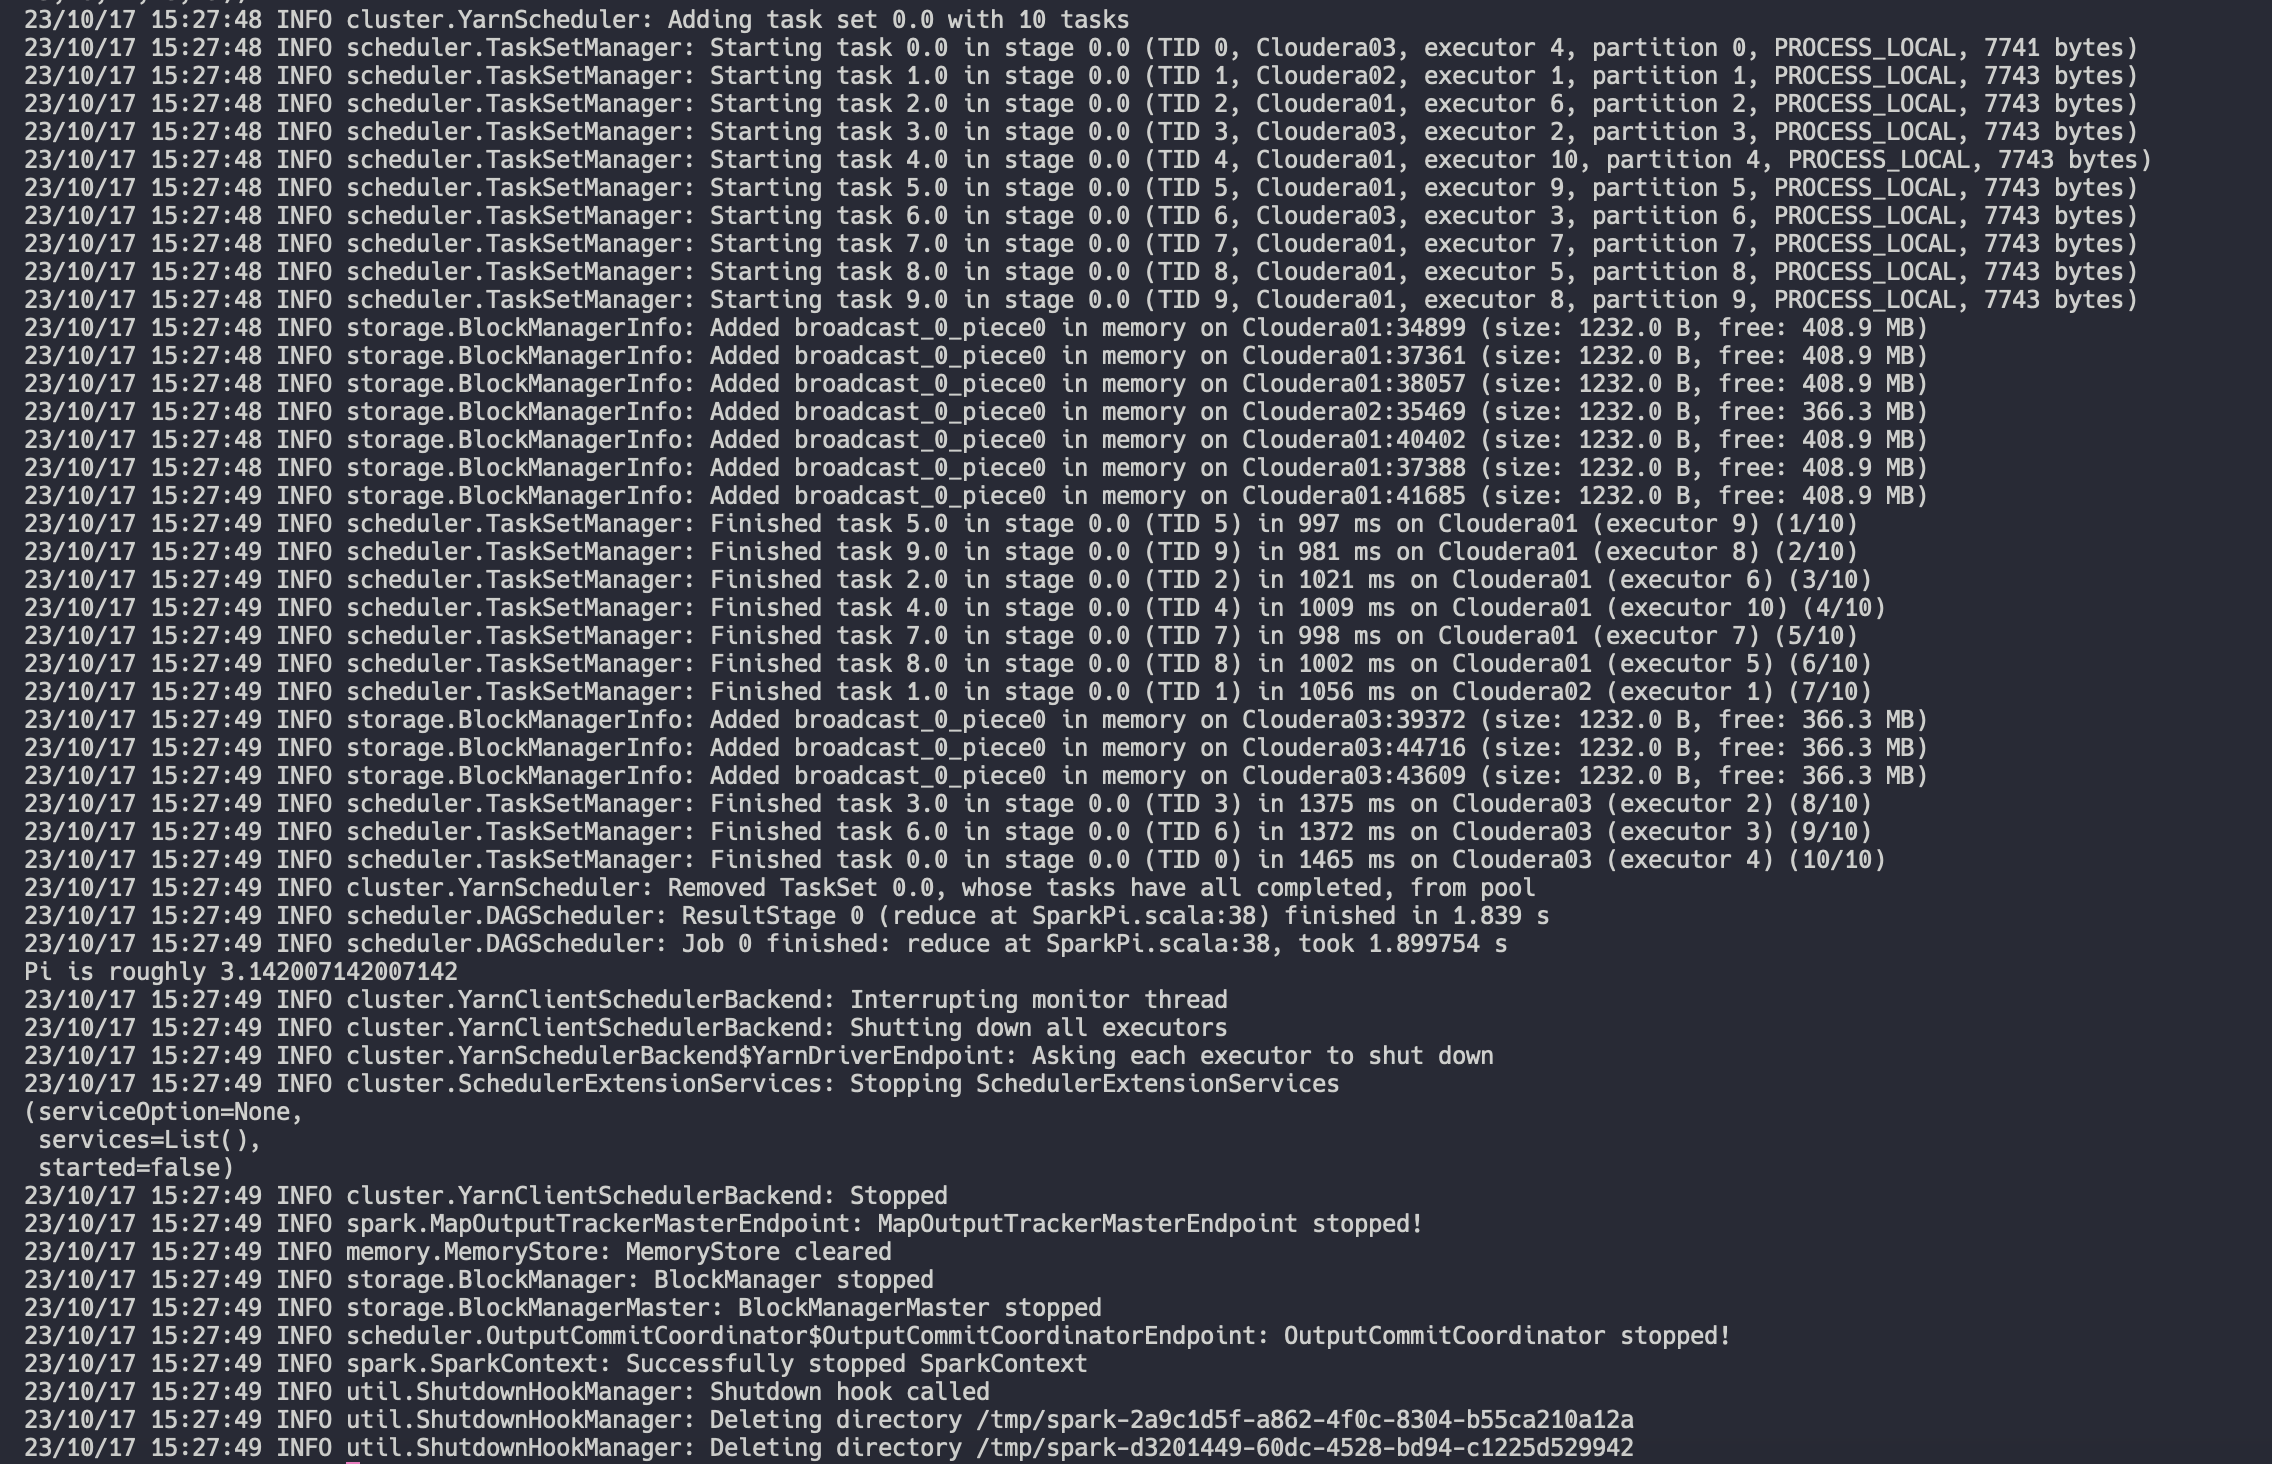

In [7]:
# spark-submit execution
!spark-submit \
--class org.apache.spark.examples.SparkPi \
--master yarn \
--deploy-mode client \
--executor-memory 1g \
--num-executors 10 \
--conf spark.default.parallelism=10 \
--conf spark.driver.extraJavaOptions="-Dspark.driver.memory=1g" \
/opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar 10

23/10/17 17:37:56 INFO spark.SparkContext: Running Spark version 2.4.0-cdh6.2.0
23/10/17 17:37:56 INFO logging.DriverLogger: Added a local log appender at: /tmp/spark-09962c54-193b-48b3-a6e7-3d6d7cb228fe/__driver_logs__/driver.log
23/10/17 17:37:56 INFO spark.SparkContext: Submitted application: Spark Pi
23/10/17 17:37:56 INFO spark.SecurityManager: Changing view acls to: xmaltast
23/10/17 17:37:56 INFO spark.SecurityManager: Changing modify acls to: xmaltast
23/10/17 17:37:56 INFO spark.SecurityManager: Changing view acls groups to: 
23/10/17 17:37:56 INFO spark.SecurityManager: Changing modify acls groups to: 
23/10/17 17:37:56 INFO spark.SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users  with view permissions: Set(xmaltast); groups with view permissions: Set(); users  with modify permissions: Set(xmaltast); groups with modify permissions: Set()
23/10/17 17:37:57 INFO util.Utils: Successfully started service 'sparkDriver' on port 40677.
23/10/17 17:37

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>2.3<span style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>Modes d'execució</h3>
<p class=MsoNormal>Quina diferència hi ha entre executar una aplicació de Spark en YARN en mode client o mode clúster? En quins casos utilitzaries cadascun d'aquests modes?</p>

Una aplicació de Spark pot ser executada en mode client o mode clúster.

En mode client, l'aplicació de Spark s'executa en el mateix node on s'inicia la sol·licitud. Això permet tenir una interacció en temps real i detallada amb l'aplicació a través de la consola del client sense haver de cercar-la a través dels registres YARN. És més adequat per l'execució d'aplicacions petites o proves, ja que tot el processament i la gestió de recursos es fan al node client.
Per altra banda, en mode clúster, l'aplicació de Spark s'executa en els nodes del clúster que YARN administra. Això permet distribuir la càrrega de manera més eficient i utilitzar tots els recursos del clúster. El clúster YARN administra i distribueix els recursos, fet que evita la sobrecàrrega del node client. Aquest mode d'execució està pensat per aplicacions grans o que requereixen molts recursos. A la vegada, aquest mode és altament escalable, ja que podem afegir més recursos al clúster depenent de les necessitats de l'aplicació, i en cas de finalitzar el node client, l'aplicació continuarà executant-se.

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>3<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span>Gestió d'aplicacions a YARN</h2>
<p class=MsoNormal>Com ja sabeu, YARN és l'encarregat de gestionar els recursos dels nodes que formen el clúster de manera global i és ell qui té la responsabilitat de distribuir les aplicacions perquè s'executin de manera paral·lela i equilibrar la càrrega entre elles.</p>
<p class=MsoNormal>Una vegada s'ha enviat una aplicació a YARN en mode clúster, aquesta s'executa sota el seu control, per això, si volem cancel·lar una aplicació, no n'hi ha prou amb fer un <span style='font-size:12.0pt;line-height:115%;font-family: "Courier New"'>cntr+c</span> sinó que hem d'indicar-ho a YARN.</p>
<p class=MsoNormal>Per a aquesta tasca i moltes altres, teniu disponible la comanda <span style='font-size:12.0pt;line-height:115%;font-family:"Courier New"'>yarn</span> al terminal <a href="https://hadoop.apache.org/docs/stable/hadoop-yarn/hadoop-yarn-site/YarnCommands.html" name="_ftnref5" title=""><span class=MsoFootnoteReference><span class=MsoFootnoteReference><span style='font-size:12.0pt;line-height:115%;font-family:"Calibri",sans-serif'>[Comandes YARN]</span></span></span></a>. En aquest exercici veurem algunes de les possibilitats que ofereix.</p>
<p class=MsoNormal>Totes les respostes a les preguntes següents han d'anar acompanyades d'evidències amb captures de pantalla.</p>
<p class=MsoNormal>Per aquest exercici, obrirem dues terminals dins del JupyterLab, una a cada pestanya. A la primera, tornarem a executar l'aplicació SparkPi en mode clúster incrementant el nombre de mostres de 10 a 10000.</p>
<p class=MsoNormal>A la segona, i mentre SparkPI s'està executant, heu de consultar les aplicacions que YARN està executant mitjançant la comanda <span style='font-size:12.0pt;line-height:115%;font-family:"Courier New"'>yarn</span>.</p>
<p>Quina comanda yarn utilitzes per llistar les aplicacions actuals? Quina és la ID que s'ha assignat? </p>

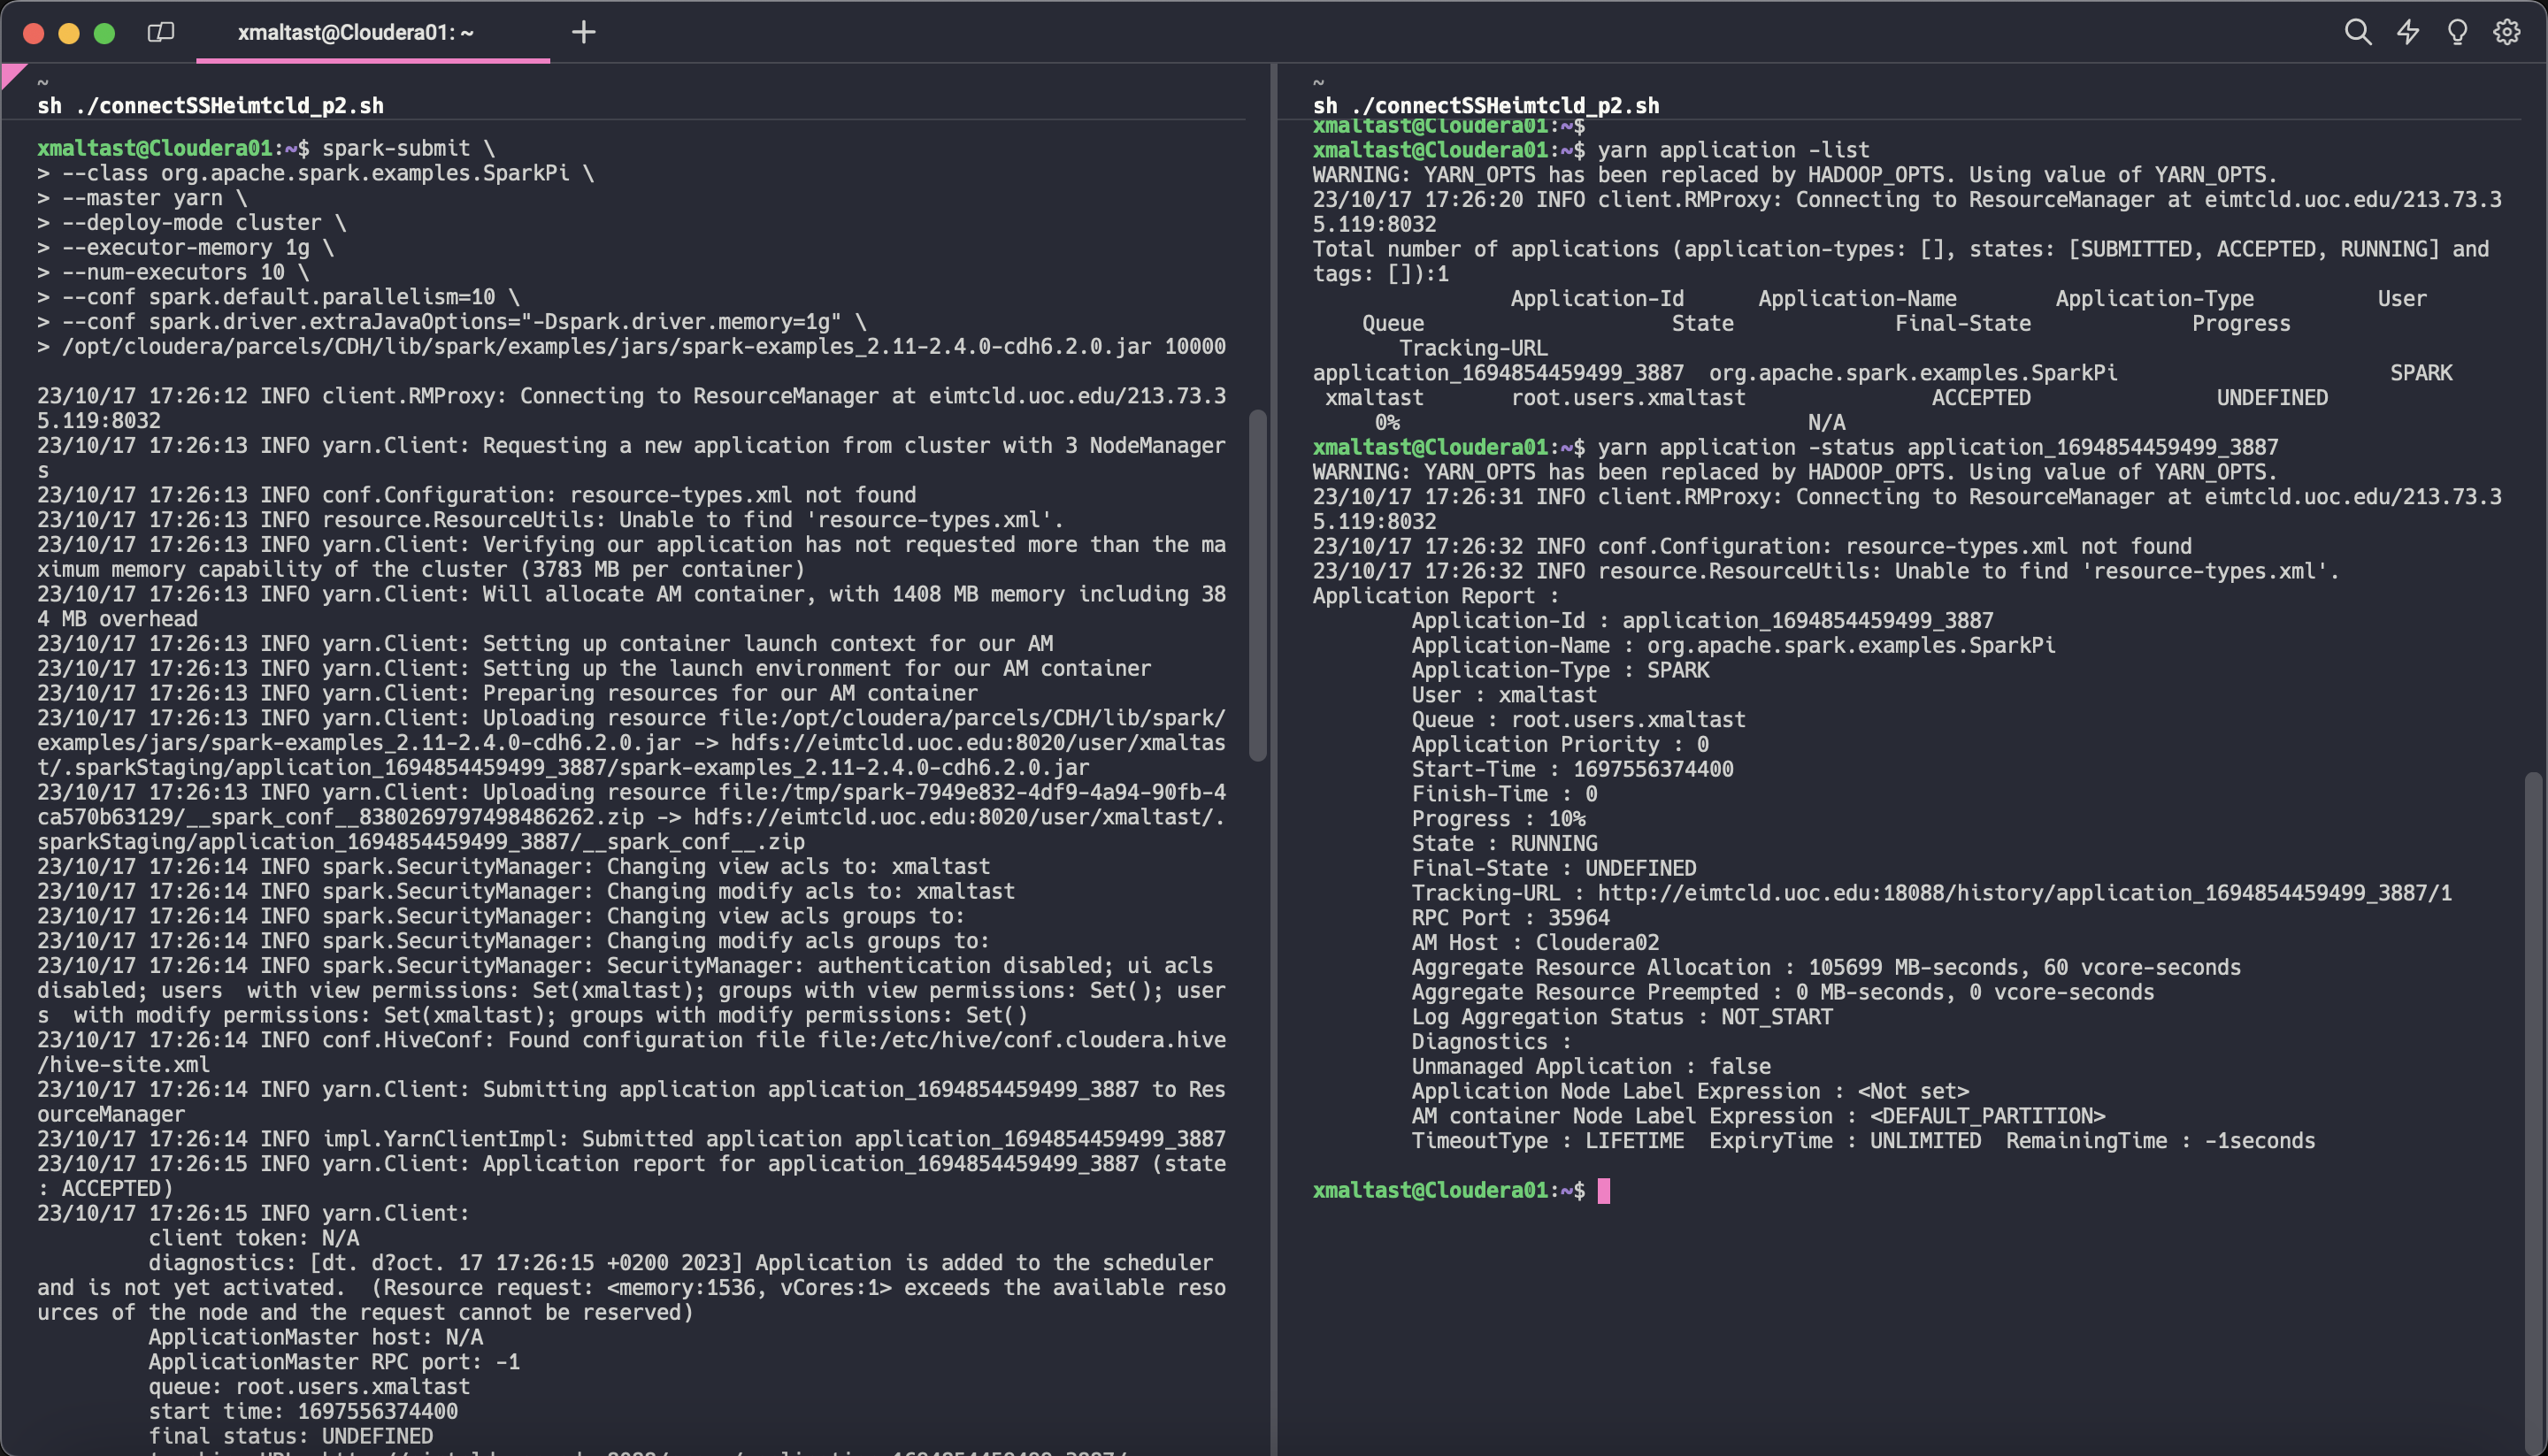

A continuació disposem de les comandes realitzades per obtenir el llistat d'aplicacions YARN juntament amb el seu identificador, i seguidament, disposem de l'estat de l'aplicació que hem especificat el seu ID.

In [ ]:
#terminal 1 code :
spark-submit \
--class org.apache.spark.examples.SparkPi \
--master yarn \
--deploy-mode cluster \
--executor-memory 1g \
--num-executors 10 \
--conf spark.default.parallelism=10 \
--conf spark.driver.extraJavaOptions="-Dspark.driver.memory=1g" \
/opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar 10000

#terminal 2 code :
yarn application -list # List YARN applications along application IDs

yarn application -status application_1694854459499_3887 #Get information of the running application

Una vegada obtingueu la Id del vostre programa, mentre la nostra aplicació està encara en execució (tarda 40 segons a executar-se depenent de la càrrega del clúster), utilitzeu la comanda yarn per aturar la seva execució.
Quina comanda heu executat?

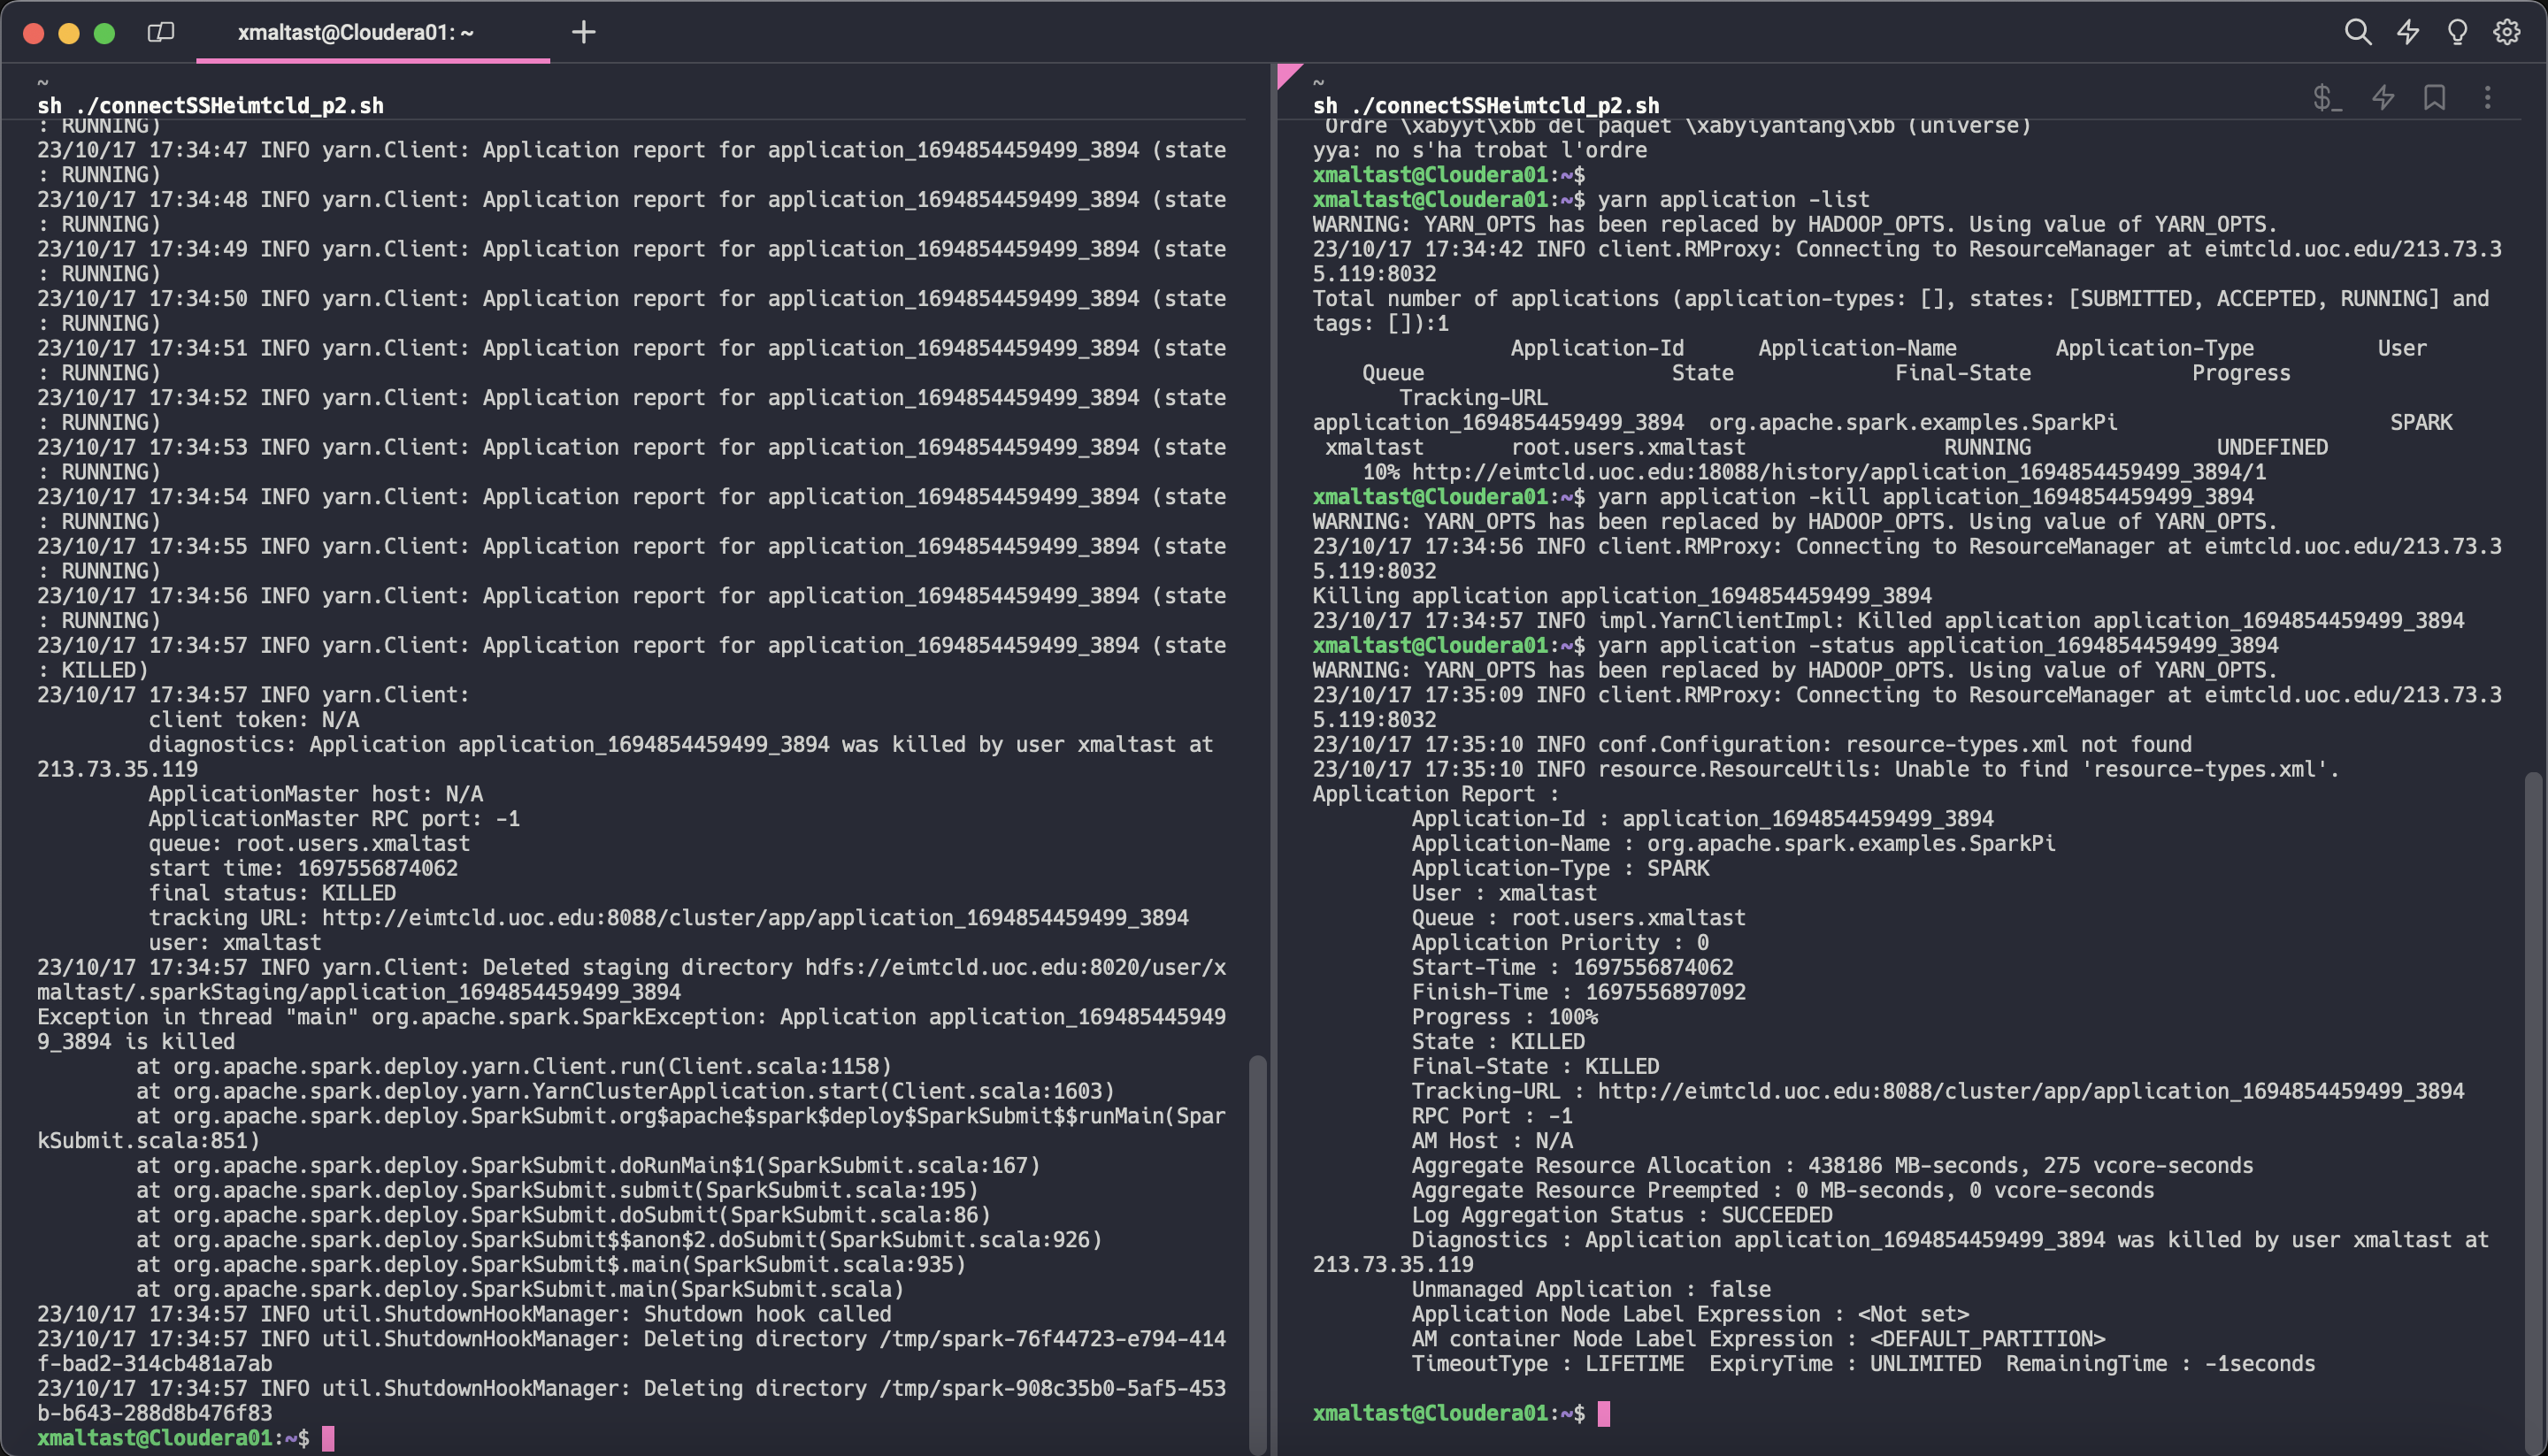

A continuació disposem de les comandes realitzades. En primer lloc, executem l'aplicació YARN (terminal 1), seguidament obtenim l'identificador de l'aplicació a través del llistat d'aplicacions YARN corrent. Aturem l'execució de l'aplicació desitjada, i finalment comprovem que l'estat d'aquesta aplicació es troba com a 'KILLED'.

In [ ]:
#terminal 1 code :
spark-submit \
--class org.apache.spark.examples.SparkPi \
--master yarn \
--deploy-mode cluster \
--executor-memory 1g \
--num-executors 10 \
--conf spark.default.parallelism=10 \
--conf spark.driver.extraJavaOptions="-Dspark.driver.memory=1g" \
/opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar 10000

#terminal 2 code :
yarn application -list # List YARN applications along application IDs

yarn application -kill application_1694854459499_3894 #Get information of the running application

yarn application -status application_1694854459499_3894 #Instruction to kill a running application

Quina comanda yarn podem utilitzar per veure l'estat de la nostra aplicació i els recursos consumits?
Quant ha consumit (en core segons) el procés que hem executat?
Nota: Només podem veure aquesta informació mentre el procés s'està executant.

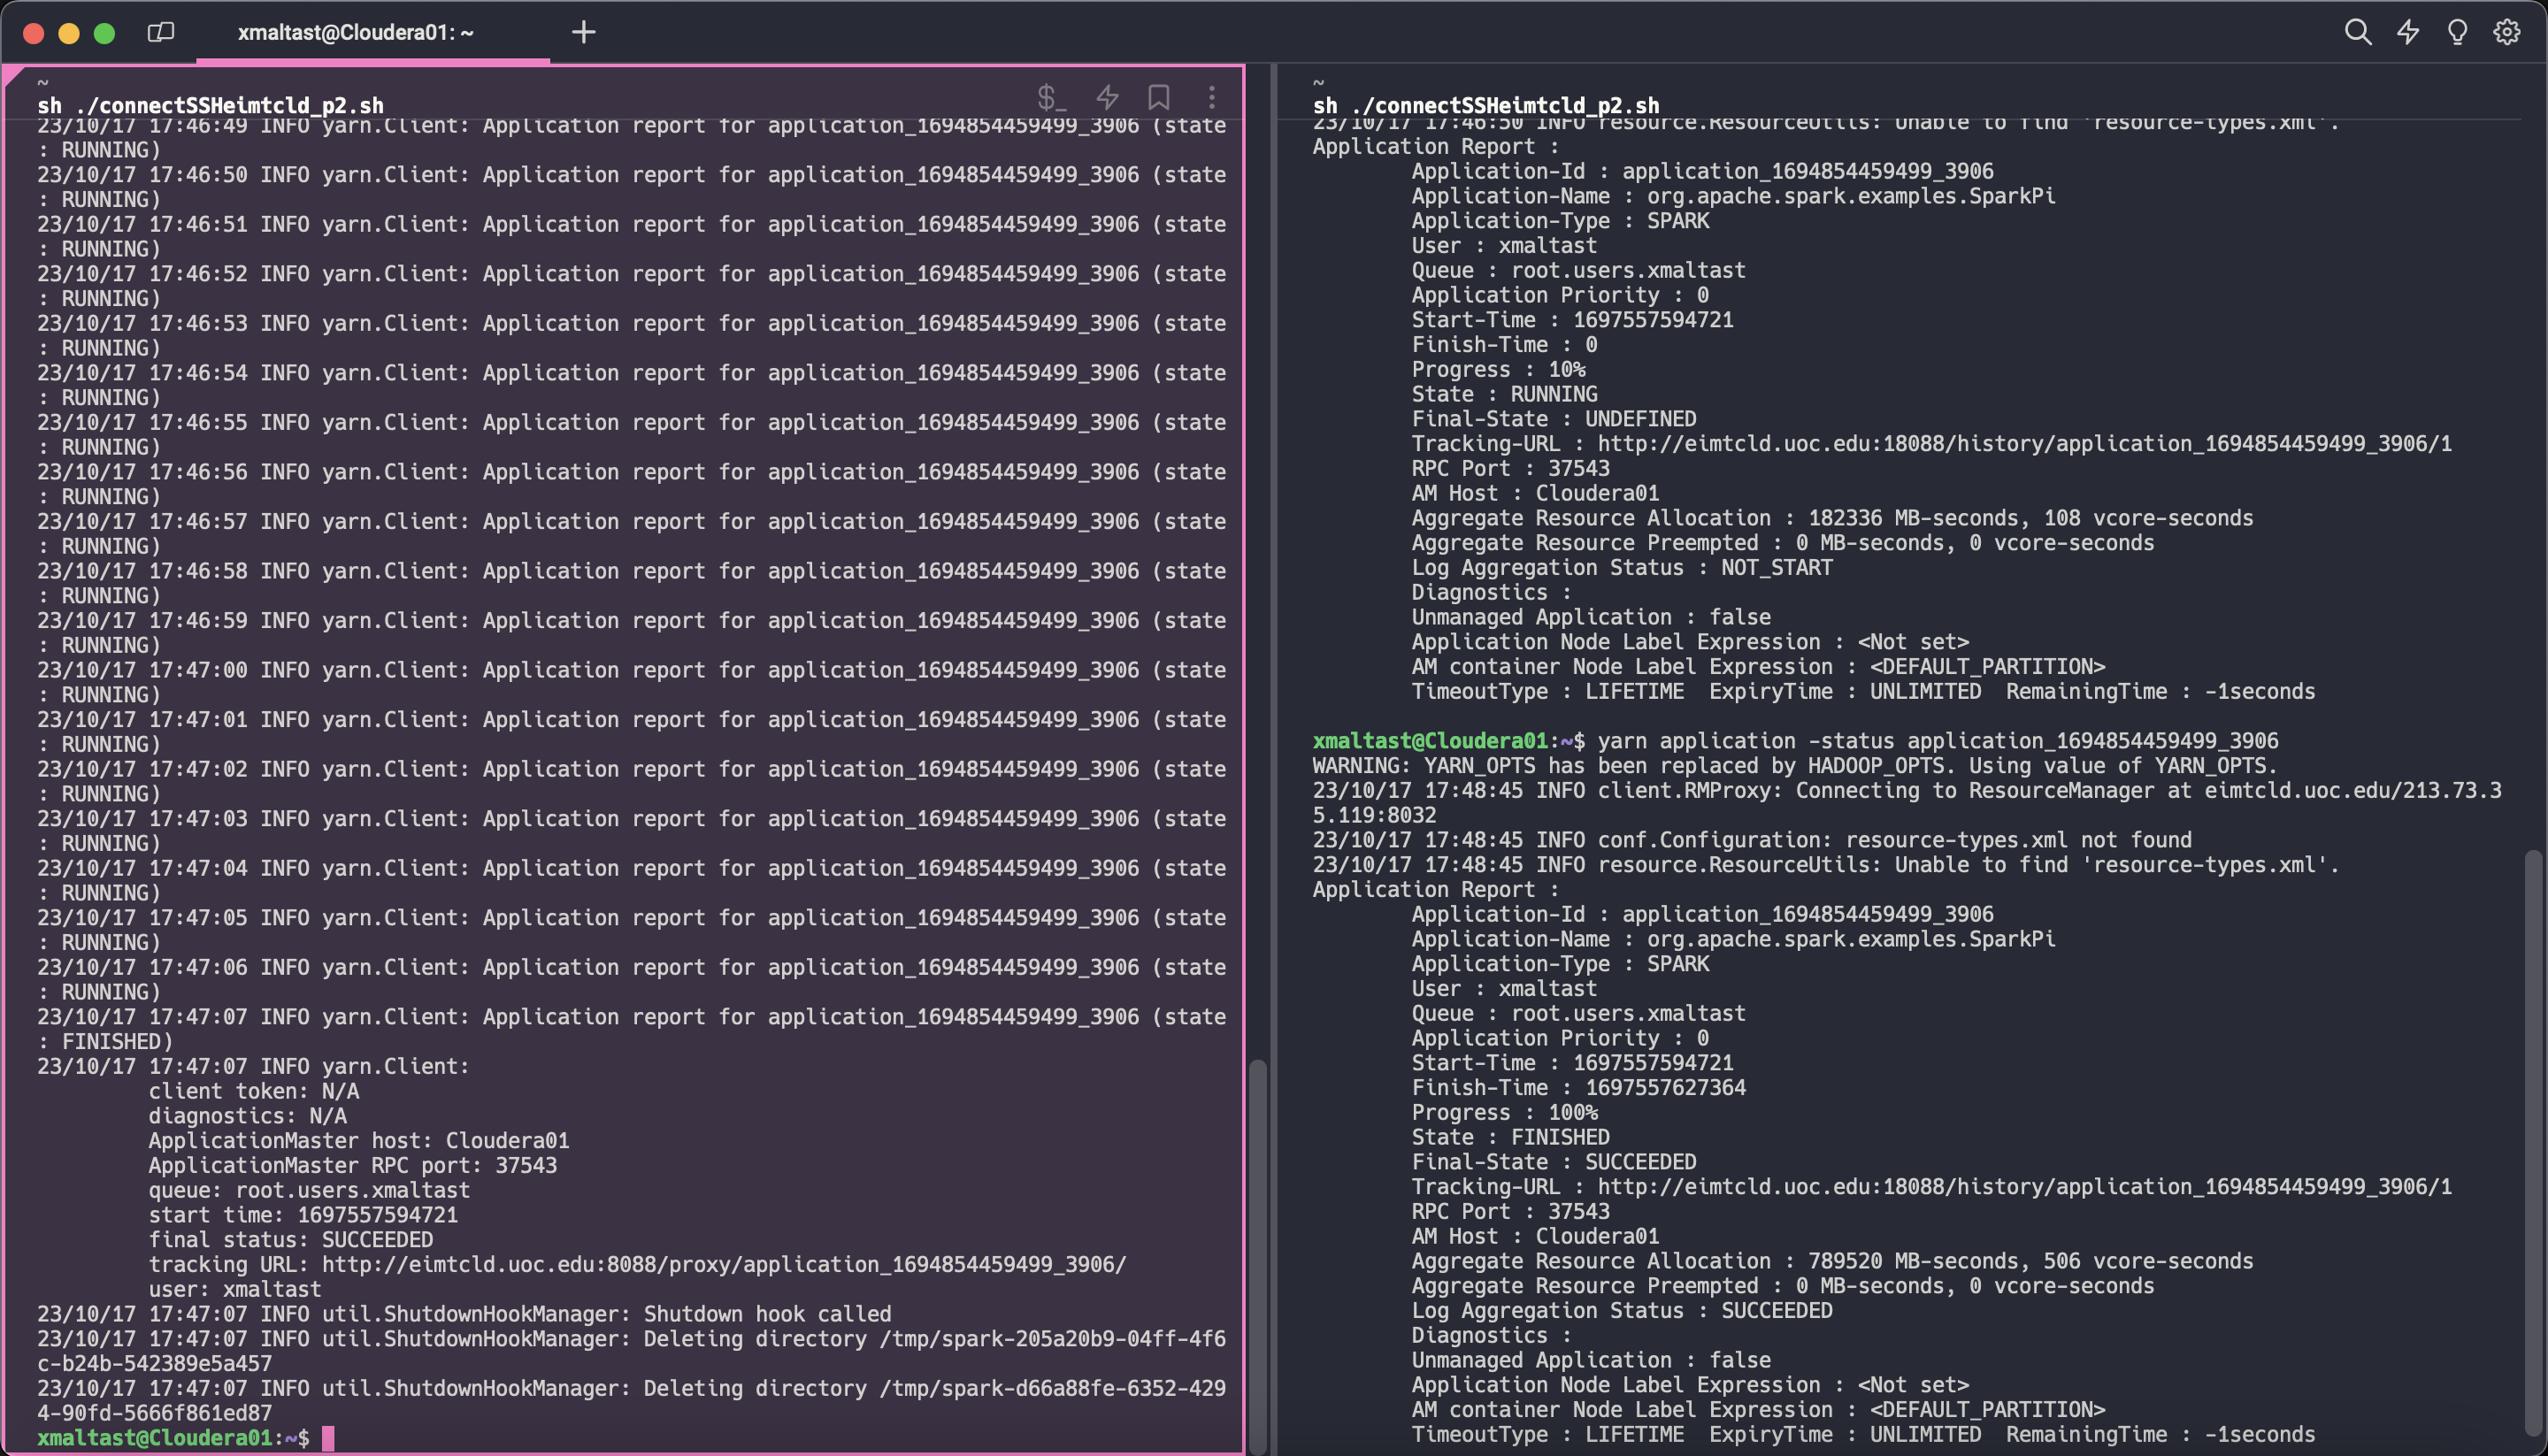

La comanda que realitzem per veure l'estat de la nostra aplicació i els recursos consumits és la mateixa que hem fet servir anteriorment. Podem veure que valor de recursos utilitzats pot variar segons quan executem la comanda.
En el primer cas (encara executant) veiem que la xifra és de: 108 vcore-seconds, mentre que un cop finalitzada la tasca, la xifra és de: 506 vcore-seconds.

In [ ]:
#terminal 1 code :
spark-submit \
--class org.apache.spark.examples.SparkPi \
--master yarn \
--deploy-mode cluster \
--executor-memory 1g \
--num-executors 10 \
--conf spark.default.parallelism=10 \
--conf spark.driver.extraJavaOptions="-Dspark.driver.memory=1g" \
/opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar 10000

#terminal 2 code :
yarn application -list # List YARN applications along application IDs

yarn application -kill application_1694854459499_3906 #Get information of the running application

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>4<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span>Vídeo resposta - Spark History Server</h2>

En aquest apartat caldrà respondre a les qüestions que es mostren a continuació mitjançant una vídeo resposta d'entre 5 i 10 minuts. Heu de realitzar una gravació on es vegi la vostra cara contestant amb les vostres pròpies paraules a les qüestions. Seguiu els següents punts per realitzar el vídeo:

1 - Al principi del vídeo heu de dir el vostre nom i DNI mentre mostreu el DNI (ha de veure's amb claredat i ser llegible).

2 - Heu de respondre a les preguntes en l'ordre en què estan, comentant sempre a l'inici de cada resposta a quina pregunta us referiu.

3 - En cas de no respondre a alguna pregunta, heu d'indicar el número de la pregunta que no respongueu i el perquè.

<p class=MsoNormal>En aquest bloc de preguntes treballarem amb l'eina de monitorització que ofereix Spark.

Es demana entrar a la Web UI del Spark History Server <a href="https://docs.cloudera.com/documentation/enterprise/6/6.2/topics/operation_spark_applications.html" name="_ftnref4" title=""><span
class=MsoFootnoteReference><span class=MsoFootnoteReference><span
style='font-size:12.0pt;line-height:115%;font-family:"Calibri",sans-serif'>[Monitoritzant Aplicacions Spark]</span></span></span></a> habilitant primerament un túnel SSH:</p>
<p class=MsoNormal>http://localhost:18088</p>
<p class=MsoNormal>i contestar les següents preguntes. Reviseu amb compte la informació que us proporciona el Spark History Server ja que no només apareixen els vostres programes. Al vídeo heu de mostrar com heu obtingut la informació que us demanem mitjançant el Spark History Server.
<h3 style='margin-left:18.0pt;text-indent:-18.0pt'> Preguntes </h3>

1 - Quin ha estat l'identificador d'aplicació que ens ha assignat YARN quan hem executat el nostre programa? (0.5 punts)

2 - Quant temps ha durat l'execució? (0.5 punts)

3 - Quants executors han intervingut durant la nostra execució i en quin node s'han aixecat? (1 punt)

4 - Quantas Tasks s'han executat per al nostre job? (1 punt)

5 - Quantas transformacions s'han invocat durant el nostre programa? (1 punt)

6 - Quants cores totals del nostre clúster han intervingut en la nostra execució? (1 punt)

Pujar el vídeo a l'apartat Canvas corresponent.

YOUR ANSWER HERE